In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
import pylab as P
import plotly.plotly as py
import seaborn as sns
sns.set(color_codes=True)

abalone = pd.read_csv('abalone.csv')

In [2]:
abalone.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalone.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Choose one variable and plot that variable four different ways.


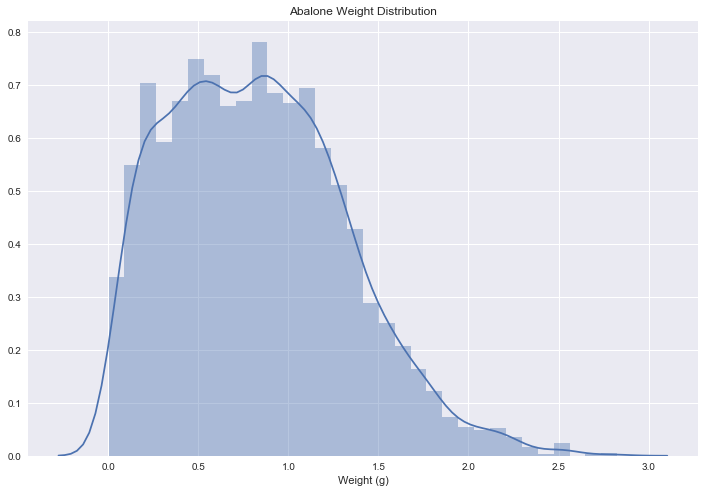

In [4]:
plt.figure(figsize=(12, 8))
sns.distplot(abalone.whole_weight)
plt.title('Abalone Weight Distribution')
plt.xlabel('Weight (g)')
plt.show()

This is a histogram with kernel density estimate. The KDE is useful because it smooths out the density estimate, making it easier to provide an estimate at a particular spot in the distribution. A drawback of this chart is that there is no information regarding how large the data set is, only the probability distribution.

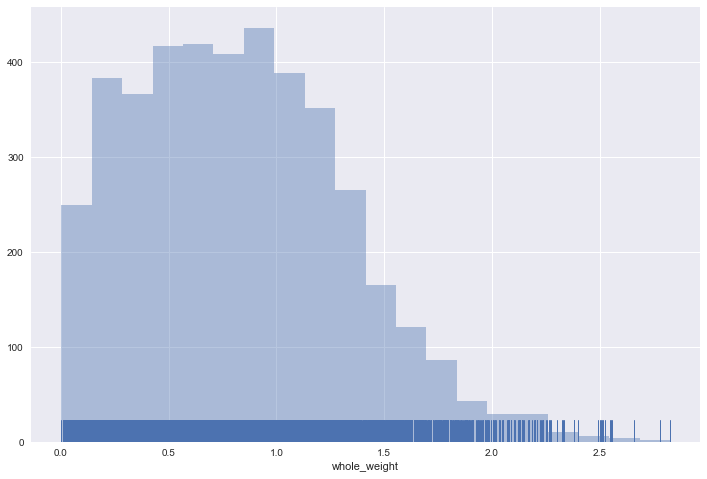

In [5]:
plt.figure(figsize=(12, 8))
sns.distplot(abalone.whole_weight, bins=20, kde=False, rug=True)
plt.show()

This histogram adds a rug plot, which is a vertical tick at each observation point. The tickmarks correlate strongly with the histogram itself, so it doesn't add a ton of new information. You can very clearly see, however, that the data is sparse at the upper values of the x-axis.

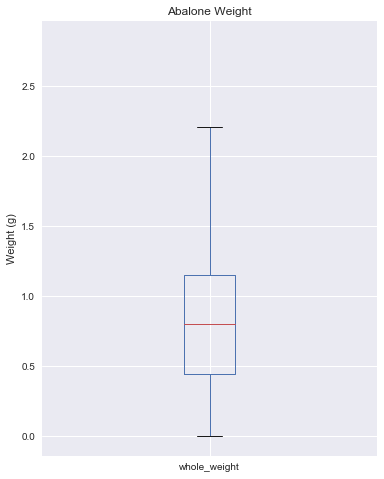

In [6]:
plt.figure(figsize=(6, 8))
abalone.boxplot(column='whole_weight')
plt.ylabel('Weight (g)')
plt.title('Abalone Weight')
plt.show()

The boxplot clearly displays the vicinity of the quartiles of the data. There is still no information about the sample size.

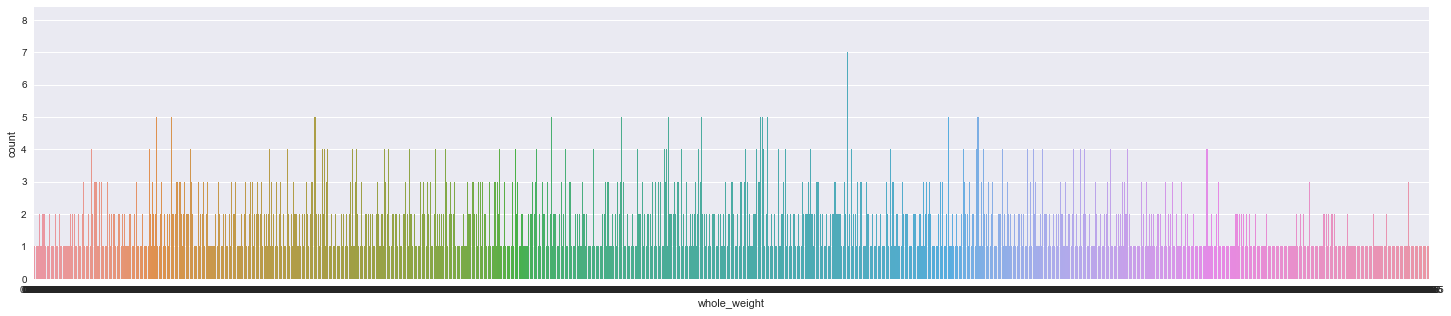

In [7]:
plt.figure(figsize=(25, 5))
sns.countplot(x="whole_weight", data=abalone)
plt.show()

This barplot is similar to the histograms above, but uses specific weight values instead of bins. An advantage to this chart is that theoretically you could determine exactly how many observations there are at each value. In practice, though, there are so many values along the x-axis that that advantage is not particularly useful.

### Choose two continuous variables, and plot them three different ways.


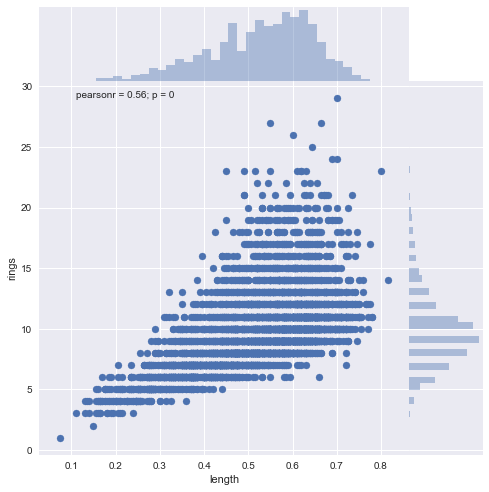

In [8]:
sns.jointplot(x="length", y="rings", data=abalone, size=7, space=0);

This scatterplot is accompanied by histograms on each axis. You can quickly see the distribution of each variable as well as the correlation between the two. The histograms also aid in determining how many data points might be present at a particular spot on the plot, although it's difficult to say exactly. The data is striated because 'rings' could be considered a categorical variable instead of a continuous one, so this may not be the best graph for this data for that reason. 

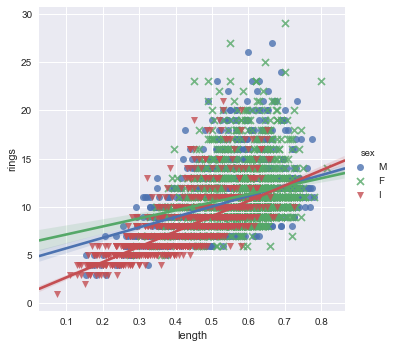

In [9]:
sns.lmplot(x="length", y="rings", hue='sex', data=abalone, markers=['o', 'x', 'v'])
plt.show()

This scatter plot includes regression lines for three categories. It is easier to extrapolate an expected value for each of the sexes of abalone. The histograms are absent so it is more difficult to determine frequency distribution. 

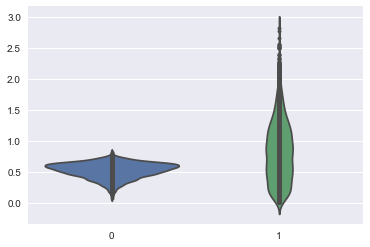

In [10]:
sns.violinplot(data=[abalone.length, abalone.whole_weight], inner="points");

This violin plot of abalone lenght and weight makes it easy to see the distribution of those two variables. Again, it would be impossible to tell what the exact numbers of the dataset or any one point are. 

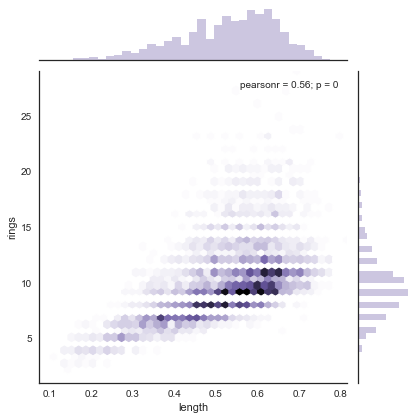

In [11]:
with sns.axes_style("white"):
    sns.jointplot(x=abalone.length, y=abalone.rings, kind="hex", color="m");

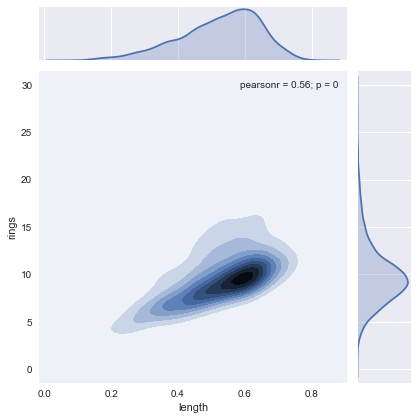

In [12]:
sns.jointplot(x="length", y="rings", data=abalone, kind="kde");

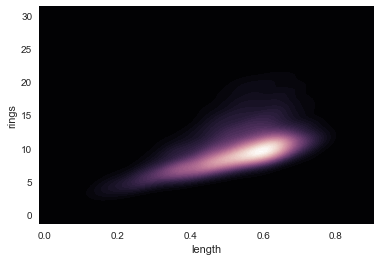

In [13]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(abalone.length, abalone.rings, cmap=cmap, n_levels=60, shade=True);

These final three graphs are sort of "heat maps" for the abalone length vs. rings data. The data shape is very similar to the scatterplot above, but it much more smoothed out and attractive to view. Compared to the scatterplot, it is easier to see where the data points are very concentrated. Plus, it even looks (sort of) like an abalone!

### Choose one continuous variable and one categorical variable, and plot them six different ways.


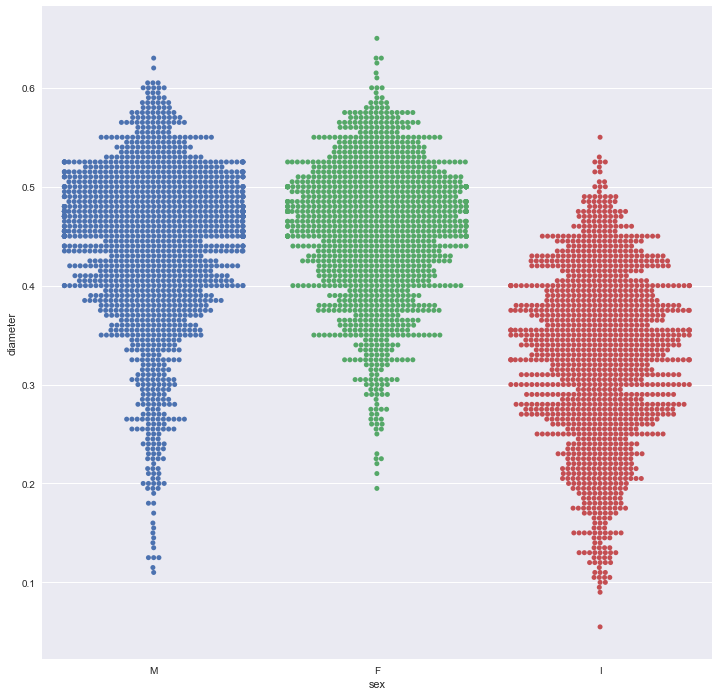

In [14]:
plt.figure(figsize=(12, 12))
sns.swarmplot(x="sex", y="diameter", data=abalone)

This categorical scatterplot positions each point at a different spot along the x-axis to avoid overlapping. This makes it easy to see the distribution, as well as each individual point in each category. It does not include summary statistics, so you would not be able to determine the median by looking at this plot.

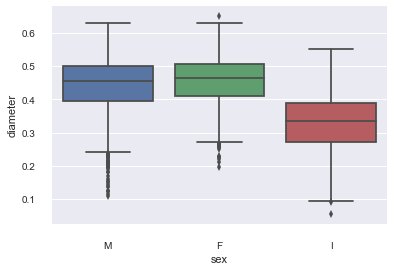

In [15]:
sns.boxplot(x="sex", y="diameter", data=abalone)
sns.despine(offset=10, trim=True)

This box plot turns out to be similar to the categorical scatterplot above, but of course does include the summary statistics. It does not include individual data point or any information about the size of the dataset. 

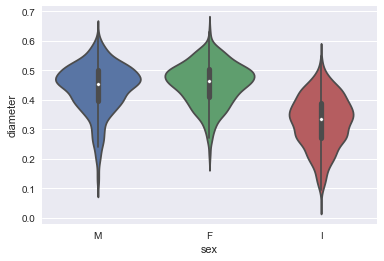

In [16]:
sns.violinplot(x="sex", y="diameter", data=abalone, split=False);

The violin plot is sort of a combination of the categorical scatterplot and boxplot. It includes markings to represent the summary statistics and bulges along the x-axis to represent frequency of observations. It is not quite as clear and specific for individual points as the scatterplot. 

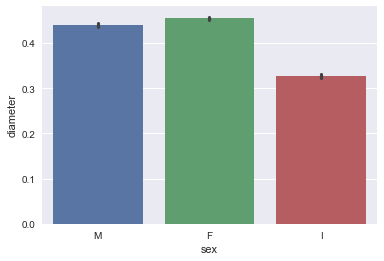

In [17]:
sns.barplot(x="sex", y="diameter", data=abalone);

This barplot displays just the mean and an error bar for each category. It contains essentially no other information so is much less useful than any of the other charts here. 

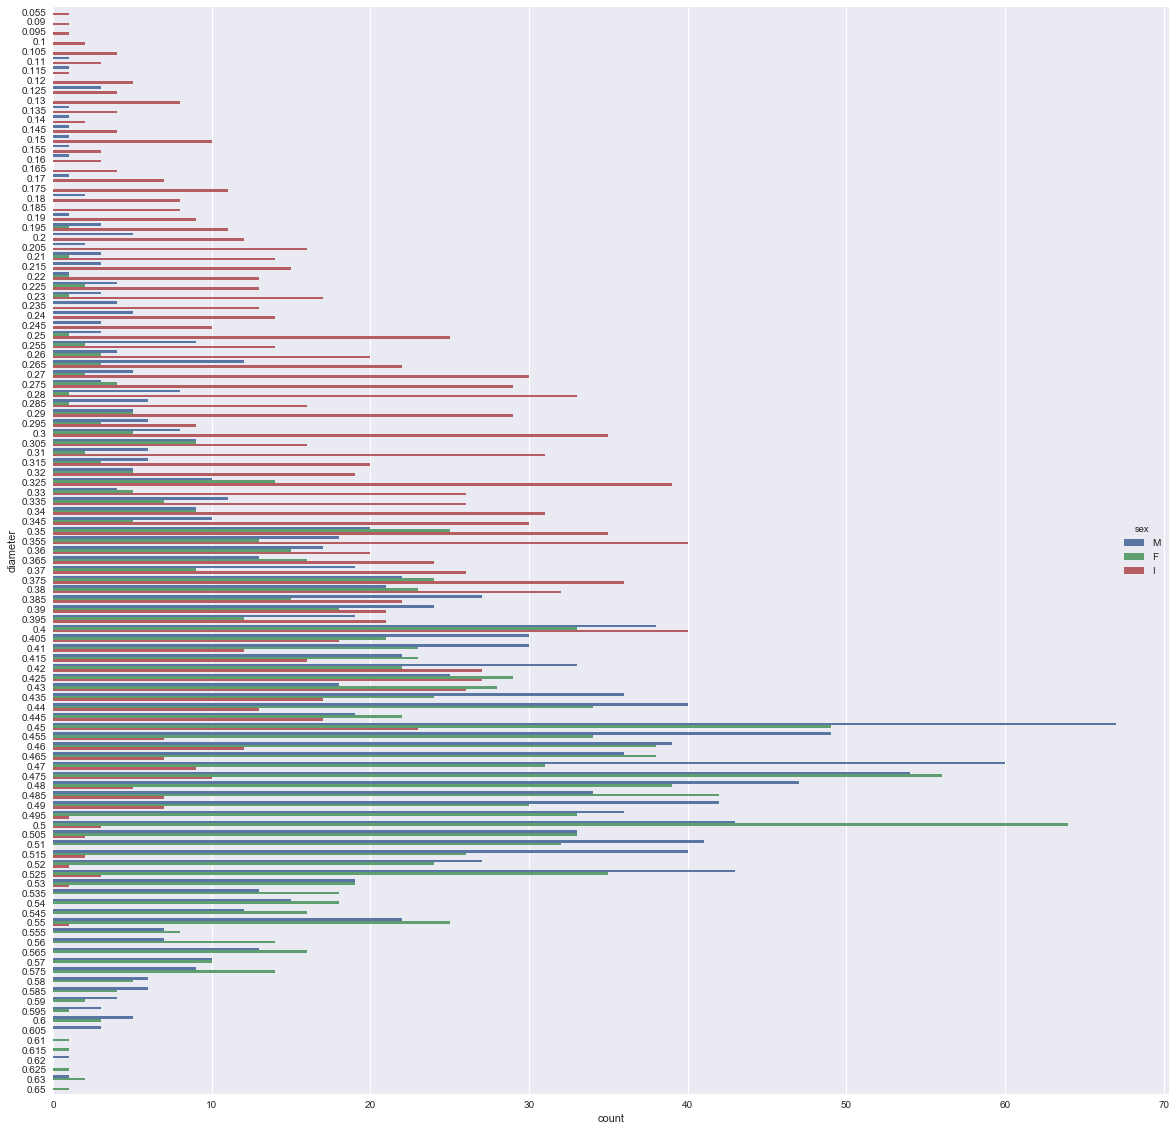

In [18]:
plt.figure(figsize=(20, 20))
sns.countplot(y="diameter", hue="sex", data=abalone);

This countplot displays each diameter value on the y-axis with the count on the x-axis, for each category. You can see how the distributions of the different categories overlap with each other and also get an exact count at each of the diameter values. This does not contain any summary statistics, so you could not get a median from this chart. 

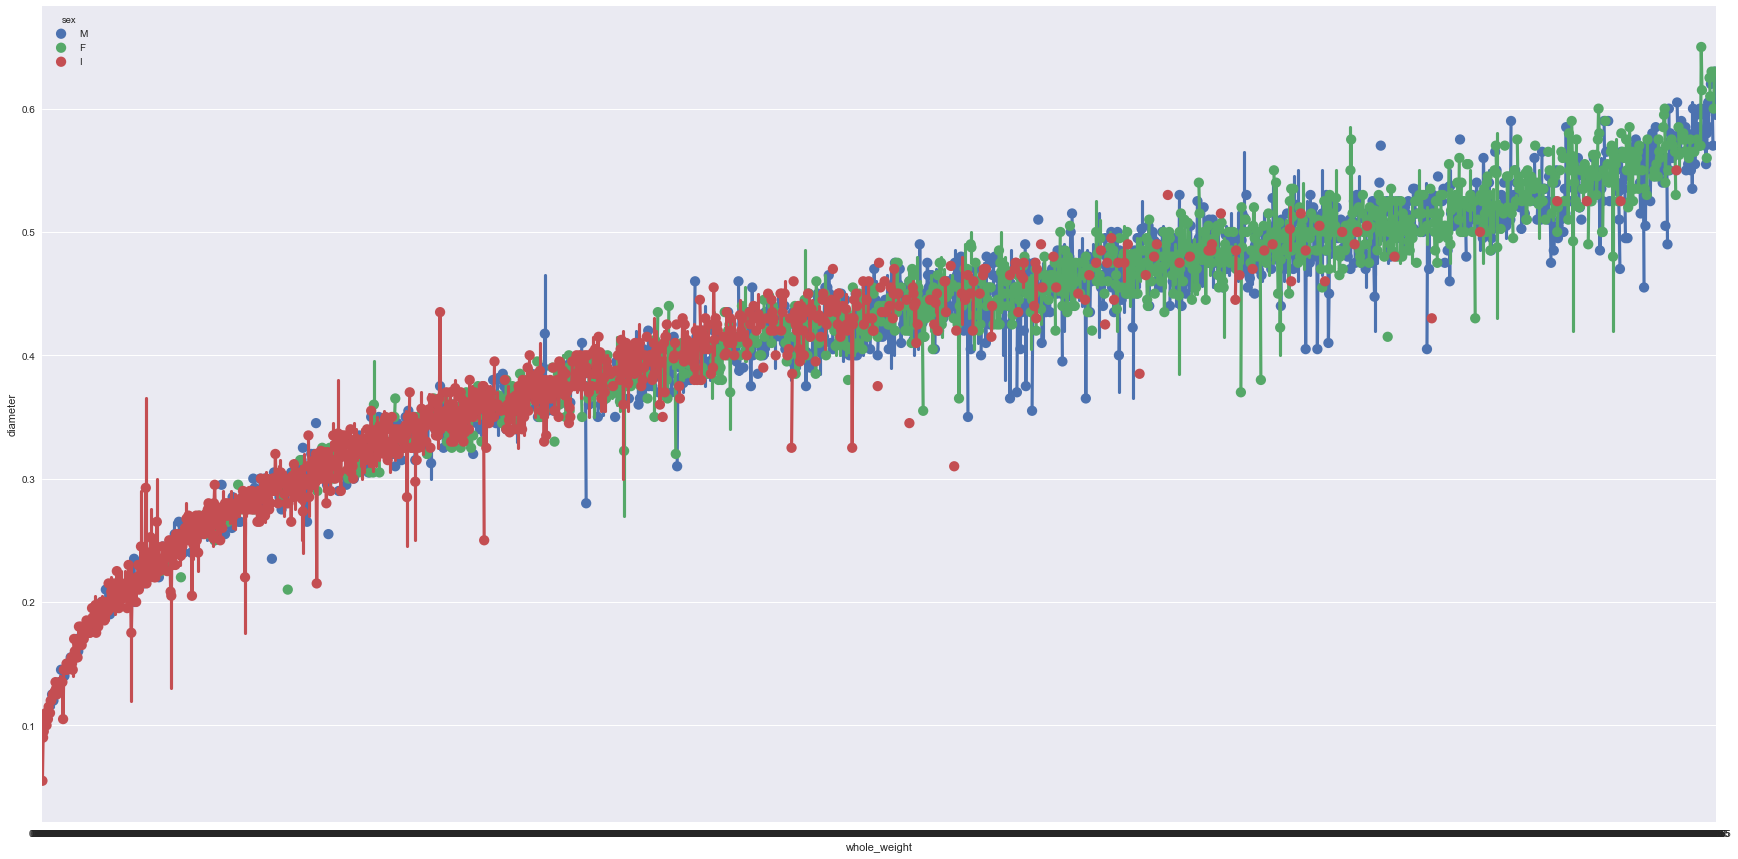

In [19]:
plt.figure(figsize=(30, 15))
sns.pointplot(x="whole_weight", y="diameter", hue="sex", data=abalone);

This pointplot shows points of whole weight plotted against diameter and includes vertical confidence interval bars for each point. It also connects each point in the same hue, which would create a clear relationship if there weren't so many data points. Again, it does not contain any summary statistics. 

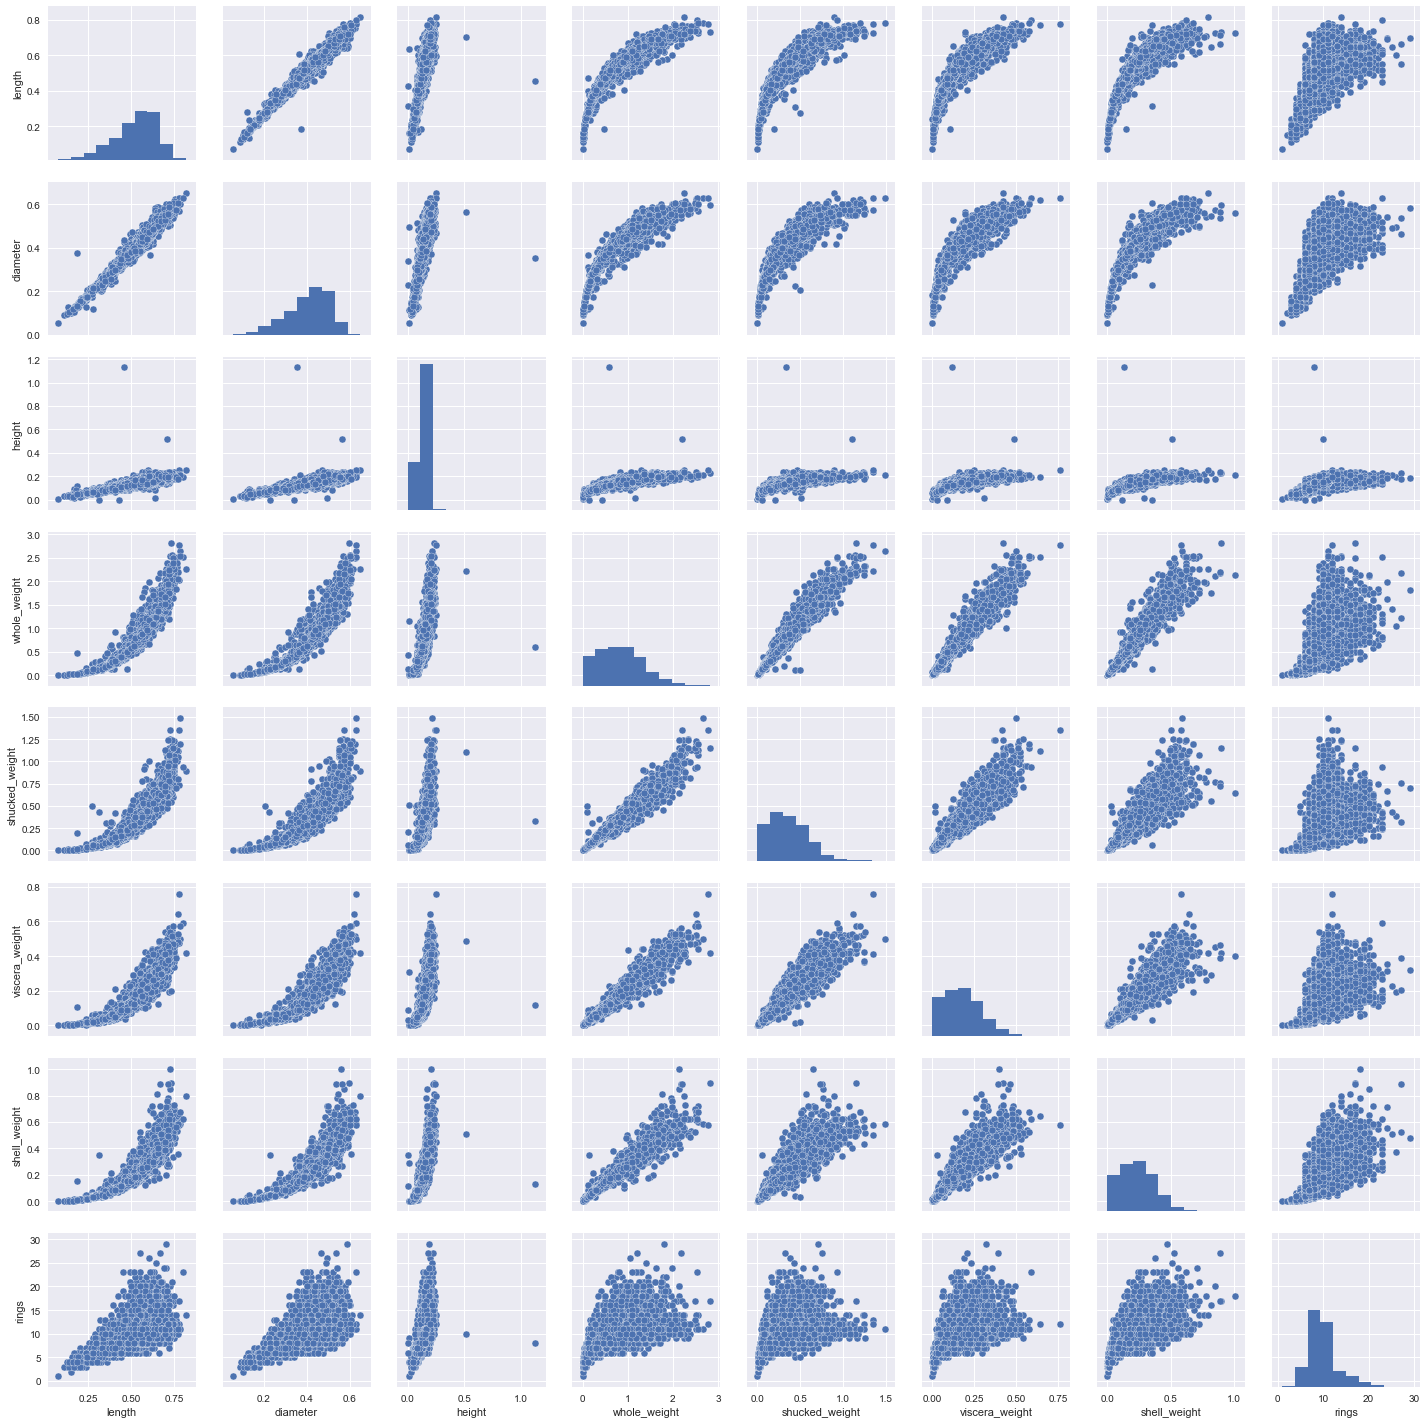

In [20]:
sns.pairplot(abalone);